

##1. Importamos las Bibliotecas

Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [ ]:
# Cargamos la imagen
image_path = '/content/tulipanes.avif'


In [ ]:
# Lee la imagen usando cv2.imread()
# Por defecto, OpenCV lee las imágenes en formato BGR
img_bgr = cv2.imread(image_path)

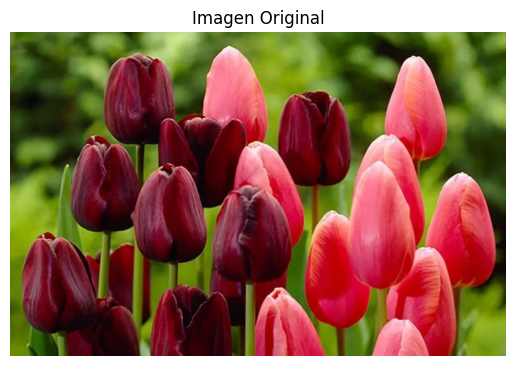

In [ ]:
# Convierte la imagen de formato BGR a RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Muestra la imagen original usando matplotlib.pyplot
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off') # Oculta los ejes
plt.show()

##3. Mejoramos la imagen

Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

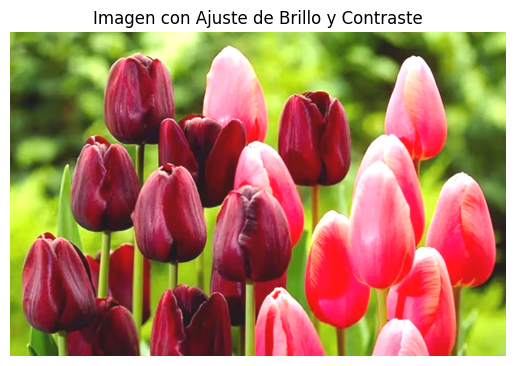

In [ ]:
# --- Ajuste de brillo y contraste ---
# Creamos una función para ajustar el brillo y contraste de una imagen.
# alpha: controla el contraste (valores > 1 aumentan el contraste)
# beta: controla el brillo (valores > 0 aumentan el brillo)
def adjust_brightness_contrast(image, alpha=1.0, beta=0):
    # Aplica la fórmula: nueva_imagen = alpha * imagen_original + beta
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

# Aplicamos el ajuste a nuestra imagen RGB (puedes cambiar los valores alpha y beta)
# Por ejemplo, alpha=1.5 para más contraste y beta=30 para más brillo
img_adjusted = adjust_brightness_contrast(img_rgb, alpha=1.3, beta=20)

# Mostramos la imagen con ajuste de brillo y contraste
plt.imshow(img_adjusted)
plt.title('Imagen con Ajuste de Brillo y Contraste')
plt.axis('off')
plt.show()


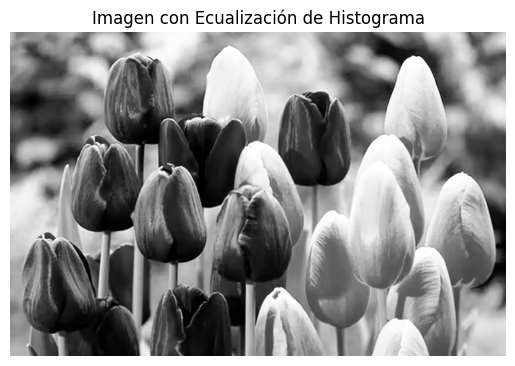

In [ ]:
# --- Ecualización de histograma ---
# La ecualización de histograma mejora el contraste distribuyendo los niveles de intensidad.
# Primero, convertimos la imagen a escala de grises porque equalizeHist trabaja con imágenes de un solo canal.
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Aplicamos la ecualización del histograma
img_equalized = cv2.equalizeHist(img_gray)

# Para mostrar la imagen ecualizada con matplotlib, que espera RGB o escala de grises,
# podemos simplemente mostrar la imagen en escala de grises ecualizada.
plt.imshow(img_equalized, cmap='gray')
plt.title('Imagen con Ecualización de Histograma')
plt.axis('off')
plt.show()

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

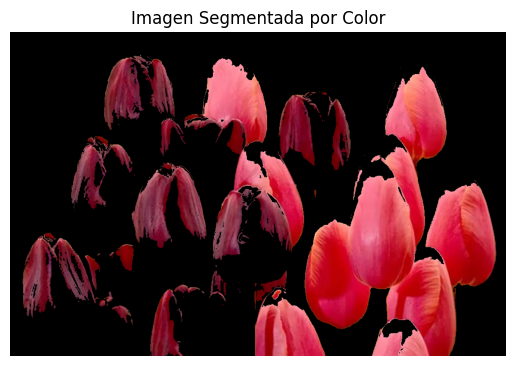

In [ ]:
# --- Segmentación por color ---

# Convertimos la imagen de RGB a HSV. El espacio de color HSV es ideal para la segmentación de color.
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Definimos el rango de color (rojo en este ejemplo para los tulipanes) en HSV.
# Debes ajustar estos valores según el color que quieras segmentar en TU imagen.
# Los valores HSV suelen estar en los rangos: H: 0-179, S: 0-255, V: 0-255
# Aquí hay un rango aproximado para el color rojo. Para otros colores, busca "HSV color picker online".
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# También podemos incluir el rango superior del rojo (que "envuelve" en el círculo de color H)
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

# Creamos una máscara para identificar los píxeles que están dentro del rango de color definido.
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)

# Combinamos las dos máscaras para el rango completo del rojo
mask = mask1 + mask2


# Aplicamos la máscara a la imagen original para quedarnos solo con los píxeles dentro del rango de color.
img_segmented = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# Mostramos la imagen segmentada por color
plt.imshow(img_segmented)
plt.title('Imagen Segmentada por Color')
plt.axis('off')
plt.show()

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

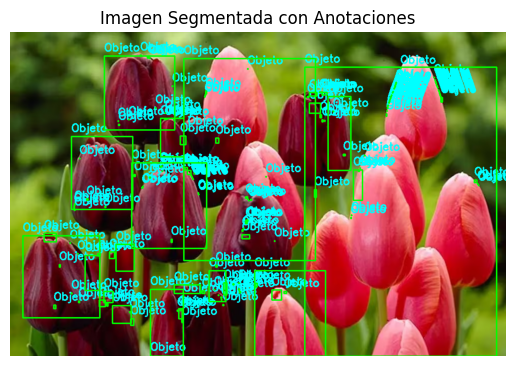

In [ ]:
# --- Dibujando y escribiendo sobre la imagen ---

# Encontrar los contornos de los objetos segmentados en la máscara.
# cv2.findContours() devuelve una lista de contornos.
# cv2.RETR_EXTERNAL recupera solo los contornos externos.
# cv2.CHAIN_APPROX_SIMPLE comprime segmentos de línea rectos, ahorrando memoria.
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Creamos una copia de la imagen original para dibujar sobre ella.
img_with_annotations = img_rgb.copy()

# Recorremos cada contorno encontrado
for contour in contours:
    # Obtenemos las coordenadas del rectángulo que encierra el contorno.
    # x, y son las coordenadas de la esquina superior izquierda, w es el ancho y h es la altura.
    x, y, w, h = cv2.boundingRect(contour)

    # Dibujamos un rectángulo alrededor del objeto.
    # cv2.rectangle(imagen, punto_inicial, punto_final, color, grosor_linea)
    # El color se especifica en formato BGR (aunque nuestra imagen es RGB, cv2 espera BGR para dibujar).
    # Usamos (0, 255, 0) para un rectángulo verde.
    cv2.rectangle(img_with_annotations, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Definimos el texto a agregar (puedes cambiarlo)
    # Reducimos el texto para que sea más corto y legible
    text = "Objeto"

    # Definimos la posición donde se colocará el texto (justo encima del rectángulo)
    text_position = (x, y - 10)

    # Definimos la fuente y escala del texto
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7 # Aumentamos la escala de la fuente
    font_color = (0, 255, 255) # Color amarillo en BGR (más visible)
    line_type = 2 # Mantenemos el tipo de línea

    # Agregamos el texto a la imagen.
    # cv2.putText(imagen, texto, posicion, fuente, escala, color, grosor_linea)
    cv2.putText(img_with_annotations, text, text_position, font, font_scale, font_color, line_type)

# Mostramos la imagen con los rectángulos y el texto
plt.imshow(img_with_annotations)
plt.title('Imagen Segmentada con Anotaciones')
plt.axis('off')
plt.show()

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

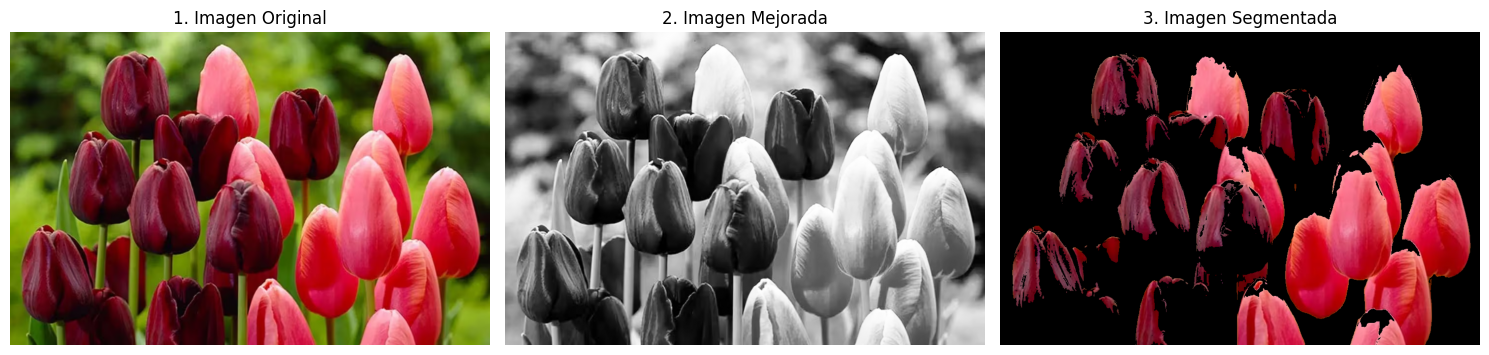

In [ ]:
plt.figure(figsize=(15, 5)) # Aqui podemos ajustar el tamaño de la imagen si es necesario.

# Imagen Original
plt.subplot(1, 3, 1) # Crea un sub-gráfico (filas, columnas, índice)
plt.imshow(img_rgb)
plt.title('1. Imagen Original')
plt.axis('off')

# Imagen Mejorada (elige una de las dos opciones comentando la otra)
plt.subplot(1, 3, 2)
# plt.imshow(img_adjusted) # Opción 1: Imagen con ajuste de brillo y contraste
plt.imshow(img_equalized, cmap='gray') # Opción 2: Imagen con ecualización de histograma (para escala de grises)
plt.title('2. Imagen Mejorada')
plt.axis('off')

# Imagen Segmentada
plt.subplot(1, 3, 3)
plt.imshow(img_segmented)
plt.title('3. Imagen Segmentada')
plt.axis('off')

plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()
